In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Figure 2 - chemical space

In [2]:
data_classes = pd.read_csv("figures_data/gnps_classes.tbd", sep="\t")
data_classes.head()

,class,count
0,Prenol lipids,2572
1,Carboxylic acids and derivatives,2366
2,Benzene and substituted derivatives,2034
3,Organooxygen compounds,1415
4,Steroids and steroid derivatives,1299


In [3]:
data_instruments = pd.read_csv("figures_data/gnps_instruments.tbd", sep="\t")
data_instruments.head()

,class,count
0,Orbitrap,211219
1,TOF,45740
2,Fourier transform,40816
3,Quadruple,11604
4,Ion trap,4396


In [4]:
data_classes["class"].to_list()

['Prenol lipids',
 'Carboxylic acids and derivatives',
 'Benzene and substituted derivatives',
 'Organooxygen compounds',
 'Steroids and steroid derivatives',
 'Flavonoids',
 'Unknown',
 'Fatty Acyls',
 'Indoles and derivatives',
 'Coumarins and derivatives',
 'Peptidomimetics',
 'Quinolines and derivatives',
 'Isoflavonoids',
 'Glycerophospholipids',
 'Benzopyrans',
 'Cinnamic acids and derivatives',
 'Azoles',
 'Glycerolipids',
 'Organonitrogen compounds',
 'Pyridines and derivatives',
 'Imidazopyrimidines',
 'Phenols',
 'Linear 1,3-diarylpropanoids',
 'Diazanaphthalenes',
 'Lupin alkaloids',
 'Phenol ethers',
 'Aporphines',
 'Macrolides and analogues',
 'Stilbenes',
 'Naphthalenes',
 'Piperidines',
 'Isoquinolines and derivatives',
 'Diazines',
 'Harmala alkaloids',
 'Diazinanes',
 'Anthracenes',
 'Macrolactams',
 'Lactones',
 'Purine nucleosides',
 'Benzodioxoles',
 'Tannins',
 'Diarylheptanoids',
 'Benzodiazepines',
 'Tetrahydroisoquinolines',
 'Neoflavonoids',
 'Pyrans',
 'Sphing

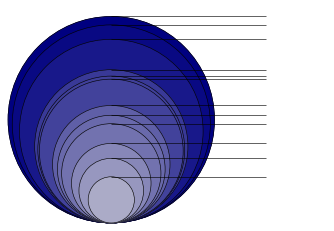

In [5]:
from clamshell_plot import clamshell_plot

clamshell_plot(data_classes["count"],
               data_classes["class"].to_list(), 20, "test.svg")
#plt.xlim(0, 10)

In [6]:
sum_as_other = ["Unknown", "EBEB", "CID"]

data_instruments = data_instruments.append({"class": "other",
                                       "count": data_instruments[data_instruments["class"].isin(sum_as_other)]["count"].sum()},
                                       ignore_index=True)
data_instruments = data_instruments[~data_instruments["class"].isin(sum_as_other)]
data_instruments

,class,count
0,Orbitrap,211219
1,TOF,45740
2,Fourier transform,40816
3,Quadruple,11604
4,Ion trap,4396
8,other,543


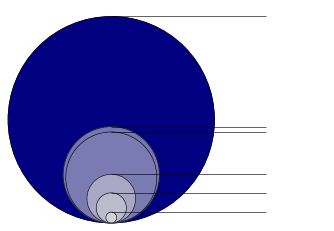

In [7]:
clamshell_plot(data_instruments["count"],
               data_instruments["class"].to_list(), 100, "test.svg")

# Figure 4 - benchmarking experiment

In [8]:
filename = "figures_data/experiment_test_set.csv"
experiment1 = pd.read_csv(filename , sep=";")
experiment1.head()

,100 test spectra,1000 test spectra,10000 test spectra
0,0.216696,0.232724,0.234756
1,0.223083,0.234166,0.237676
2,0.196023,0.233083,0.236004
3,0.223550,0.237448,0.232886
4,0.246628,0.237992,0.237038


In [9]:
experiment1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   100 test spectra    998 non-null    float64
 1   1000 test spectra   100 non-null    float64
 2   10000 test spectra  10 non-null     float64
dtypes: float64(3)
memory usage: 23.6 KB


<AxesSubplot:ylabel='Frequency'>

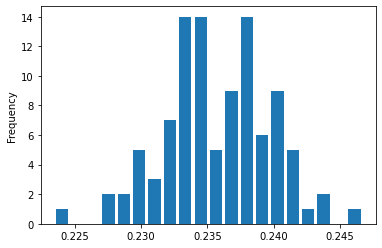

In [10]:
experiment1.iloc[:, 1].plot(kind="hist", bins=20, rwidth=0.8)

Text(0.5, 0, 'RMSE')

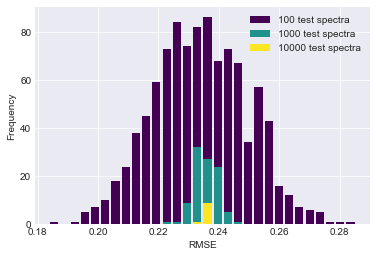

In [11]:
plt.style.use("seaborn-dark")

experiment1.plot(kind="hist", bins=30, rwidth=0.8,
                 cmap="viridis", grid=True)
plt.xlabel("RMSE")

In [12]:
filename = "figures_data/experiment_weight_ranges.csv"
experiment2 = pd.read_csv(filename , sep=";")
experiment2 = experiment2.set_index("molecular_weight_range")
experiment2.head()

,rmse
molecular_weight_range,
0-200 Da,0.266
200-300 Da,0.267
300-400 Da,0.257
400-500 Da,0.281
500-600 Da,0.242


Text(0, 0.5, 'Molecular weight range')

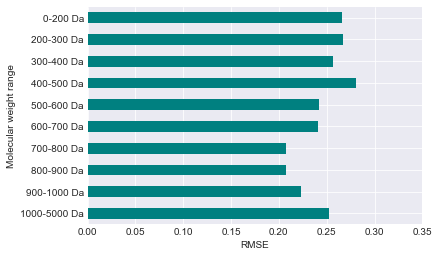

In [13]:
plt.style.use("seaborn-dark")

experiment2[::-1].plot(kind="barh",
                       color="teal", grid=True, legend=False)
plt.xlim(0, 0.35)
plt.xlabel("RMSE")
plt.ylabel("Molecular weight range")

In [14]:
filename = "figures_data/experiment_chemical_class.csv"
experiment3 = pd.read_csv(filename , sep=";")
experiment3 = experiment3.set_index("chemical_class")
experiment3.head()

,RMSE
chemical_class,
Organic acids and derivatives,0.314
Organoheterocyclic compounds,0.299
Phenylpropanoids and polyketides,0.296
Lipids and lipid-like molecules,0.321
Benzenoids,0.297


Text(0, 0.5, 'Chemical class')

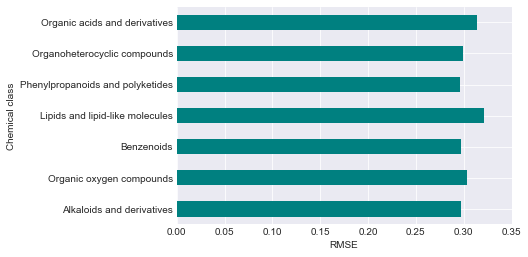

In [15]:
plt.style.use("seaborn-dark")

experiment3[::-1].plot(kind="barh",
                       color="teal", grid=True, legend=False)
plt.xlim(0, 0.35)
plt.xlabel("RMSE")
plt.ylabel("Chemical class")

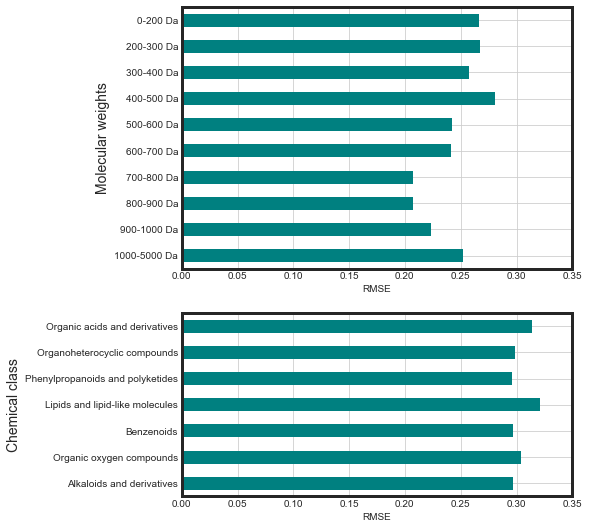

In [16]:
plt.style.use("seaborn-white")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 9),
                              gridspec_kw={
                               'width_ratios': [1],
                               'height_ratios': [1.0, 0.7]})


experiment2[::-1].plot(kind="barh",
                       color="teal", grid=True, legend=False,
                      ax=ax1)
experiment3[::-1].plot(kind="barh",
                       color="teal", grid=True, legend=False,
                      ax=ax2)

ax1.set_xlim(0, 0.35)
ax2.set_xlim(0, 0.35)
ax1.set_xlabel("RMSE")
ax2.set_xlabel("RMSE")
ax1.set_ylabel("Molecular weights", fontsize=14)
ax2.set_ylabel("Chemical class", fontsize=14)
ax1.spines[:].set_linewidth(3)
ax2.spines[:].set_linewidth(3)
plt.savefig("benchmarking_experiment_01.png", dpi=400,
           bbox_inches="tight")
plt.savefig("benchmarking_experiment_01.svg", dpi=400,
           bbox_inches="tight")

In [17]:
data = experiment1.iloc[:, 2]
#data = data/max(data)
x = np.linspace(experiment1.min().min(), experiment1.max().max(), 100)
histogram = np.histogram(data, x)

In [18]:
histogram = np.histogram(data, x)

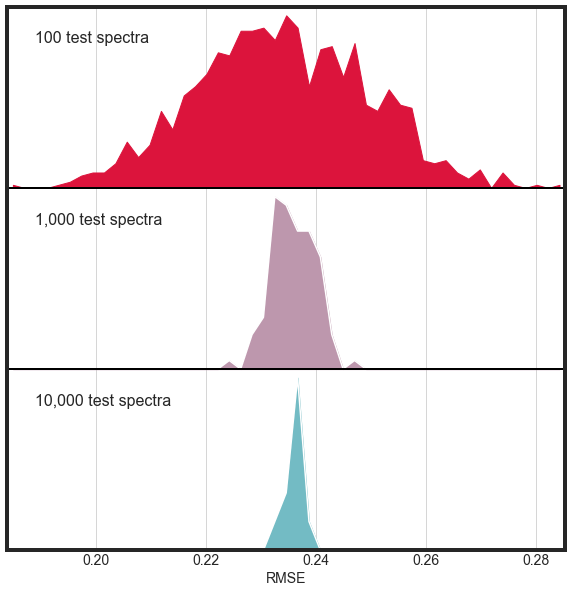

In [20]:
from matplotlib.colors import LinearSegmentedColormap

colors = ["crimson", "lightblue", "teal"]
cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)
plt.style.use('seaborn-white')
shift = 1.05#0.8
alpha = 1.0 #0.5

# Create plot
fig, ax = plt.subplots(figsize=(10,10))

x = np.linspace(experiment1.min().min(), experiment1.max().max(), 50)
x_middle = x[:-1] + (x[1] - x[0])/2

num = experiment1.shape[1]
labels = ["100 test spectra", "1,000 test spectra", "10,000 test spectra"]

for i in range(3):
    data = experiment1.iloc[:, i].dropna()
    #data = data/max(data)
    histogram = np.histogram(data, x)
    distribution = histogram[0]/np.max(histogram[0])
    ax.fill_between(x_middle, -shift*i, -shift*i + distribution, color=cmap1(i/num), alpha=alpha)
    if i > 0:
        plt.plot(x_middle, -shift*i + distribution, color="white")
    #if bin_content:
    ax.text(x[0] + 0.005, -shift*i + 0.8*shift,
             labels[i],
             #f"RMSE distribution for subsets of \n {labels[i]}",
            fontsize=16)#, color="white")

plt.xticks(fontsize=14)
#plt.yticks(-shift*np.arange(num), labels, fontsize=14)
plt.tick_params(left=False, labelleft=False, width=8)
plt.xlabel("RMSE", fontsize=14)
#plt.ylabel(ylabel, fontsize=14)
plt.xlim([x[0], x[-1]])
plt.ylim([-2*shift, shift])
plt.axhline(y=-shift, color="black", linewidth=2)
plt.axhline(y=0, color="black", linewidth=2)
#ax.tick_params(width=8)
ax.spines[:].set_linewidth(4)
plt.gca().xaxis.grid(True)
plt.savefig("benchmarking_experiment_02.png", dpi=400,
           bbox_inches="tight")
plt.savefig("benchmarking_experiment_02.svg", dpi=400,
           bbox_inches="tight")

<AxesSubplot:>

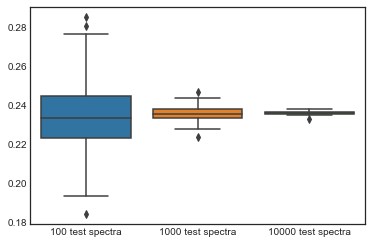

In [22]:
import seaborn as sb

sb.boxplot(data=experiment1)